In [22]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn import linear_model
from sklearn import ensemble
from sklearn import naive_bayes

from imblearn.under_sampling import RandomUnderSampler

In [2]:
def my_import():
    
    # Still including terror attacks...
    
    df = pd.read_csv("interpolated_df.csv", index_col= 0)

    ucdp = pd.read_csv("/home/polichinel/Dropbox/KU/9.semester/friopgave/data/upsala/ged181.csv")# the error is not importent as you do not use that feature 
    ucdp =  ucdp[ucdp['gwnob'].isna()] # only conflicts NOT between to stats

    ucdp_agg = ucdp.groupby(by = ['country_id','year'])[['best']].sum().reset_index()

    cow = pd.read_csv("COW country codes.csv")
    cow.rename(columns={'CCode' : 'country_id', 'StateAbb' : 'country'}, inplace = True)
    
    # CCode and country_id should correspond but check GW 2013!

    cow_ucdp_agg = cow.merge(ucdp_agg, on = 'country_id', how = 'outer')

    cow = pd.read_csv("COW country codes.csv")
    cow.rename(columns={'CCode' : 'country_id', 'StateAbb' : 'country'}, inplace = True)

    cow_ucdp_agg = cow.merge(ucdp_agg, on = 'country_id', how = 'outer')

    df_cow_ucdp_agg = df.merge(cow_ucdp_agg, on = ['country', 'year'], how = 'left')
    df_cow_ucdp_agg['best'].fillna(0,inplace = True)
    
    df_cow_ucdp_agg_lean = df_cow_ucdp_agg[['best','indegree_norm','outdegree_norm','degree_norm','center','downgrading','slope_indegree','slope_outdegree']]
    
    return(df_cow_ucdp_agg_lean)

In [3]:
df = my_import()

/home/polichinel/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2802: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
df.shape

(8101, 8)

In [5]:
df.dropna().shape # Why? Where?

(5928, 8)

In [6]:
df.dropna(inplace = True)

#y = df['best'].copy()

y = np.array(df['best'] > 0).astype('int') # y_dum
X = df[['indegree_norm','outdegree_norm','degree_norm','center','downgrading','slope_indegree','slope_outdegree']]

#X_resampled, y_resampled = RandomUnderSampler(random_state=42).fit_sample(X,y)

# Du skal nok ige havde lavet dig et test set...

In [7]:
y.sum()/y.shape

array([0.19787449])

In [42]:
time_start = time.time()

sfs_f = sfs(estimator = linear_model.LogisticRegression(), k_features= 'best', forward = True, verbose = 2, scoring = 'roc_auc', cv = 10, n_jobs = 6)

sfs_f = sfs_f.fit(X,y)


time_stop = time.time()
time_to_finish = time_stop - time_start

print('\nminutes it took: {}\n'. format(time_to_finish/60))


[Parallel(n_jobs=6)]: Done   4 out of   7 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=6)]: Done   7 out of   7 | elapsed:    0.2s finished

[2018-11-28 14:20:39] Features: 1/7 -- score: 0.6036502587379562[Parallel(n_jobs=6)]: Done   3 out of   6 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:    0.2s finished

[2018-11-28 14:20:40] Features: 2/7 -- score: 0.6152940922429038[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.2s finished

[2018-11-28 14:20:40] Features: 3/7 -- score: 0.6189433705502604[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.2s finished

[2018-11-28 14:20:40] Features: 4/7 -- score: 0.6172890464747394[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:    0.1s finished

[2018-11-28 14:20:41] Features: 5/7 -- score: 0.6060917199561268


minutes it took: 0.033361907800038657



[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.1s finished

[2018-11-28 14:20:41] Features: 6/7 -- score: 0.5998518334527937[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished

[2018-11-28 14:20:41] Features: 7/7 -- score: 0.5273819274135694

In [43]:

def first_best(selector = sfs_f):

    result = 0

    for i in np.arange(1,len(selector.k_feature_idx_)+1):

        if selector.get_metric_dict()[i]['avg_score'] > result:

            result = selector.get_metric_dict()[i]['avg_score']
            feature_index = selector.get_metric_dict()[i]['feature_idx']
            feature_names = selector.get_metric_dict()[i]['feature_names']
            n_features = len(feature_index)

        else:
            break
     
    return([n_features,result,feature_index,feature_names])

In [44]:
best_set = first_best()
best_set

[3,
 0.6189433705502604,
 (0, 4, 5),
 ('indegree_norm', 'downgrading', 'slope_indegree')]

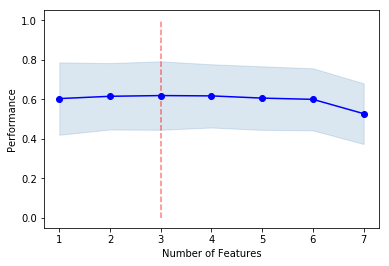

In [45]:
plot_sfs(sfs_f.get_metric_dict(), kind='std_dev')
plt.vlines(best_set[0], 0, 1, 'red', 'dashed', alpha = 0.5)


plt.show()

# you compare to GDP per capita?

In [46]:
sfs_f.get_metric_dict()

{1: {'avg_score': 0.6036502587379562,
  'ci_bound': 0.1359417818782211,
  'cv_scores': array([0.58423836, 0.71005733, 0.20115546, 0.39974323, 0.47689076,
         0.78022492, 0.68426451, 0.64969861, 0.82546109, 0.72476833]),
  'feature_idx': (0,),
  'feature_names': ('indegree_norm',),
  'std_dev': 0.18303408033795227,
  'std_err': 0.06101136011265075},
 2: {'avg_score': 0.6152940922429038,
  'ci_bound': 0.12477863782051132,
  'cv_scores': array([0.60484618, 0.73421699, 0.22481662, 0.44000934, 0.53800366,
         0.64978857, 0.70243815, 0.67712101, 0.83872245, 0.74297796]),
  'feature_idx': (0, 5),
  'feature_names': ('indegree_norm', 'slope_indegree'),
  'std_dev': 0.16800385358902417,
  'std_err': 0.056001284529674726},
 3: {'avg_score': 0.6189433705502604,
  'ci_bound': 0.12861814506558394,
  'cv_scores': array([0.60246048, 0.75869712, 0.22013424, 0.44015298, 0.53434066,
         0.64179937, 0.71364822, 0.67845254, 0.84116959, 0.7585785 ]),
  'feature_idx': (0, 4, 5),
  'feature_na